In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [22]:
dataset_train = pd.read_csv("Salestrain.csv")
dataset_test = pd.read_csv("Salestest.csv")

In [23]:
dataset_train.shape

(96, 1)

In [24]:
dataset_train.head()

,data
0,112
1,118
2,132
3,129
4,121


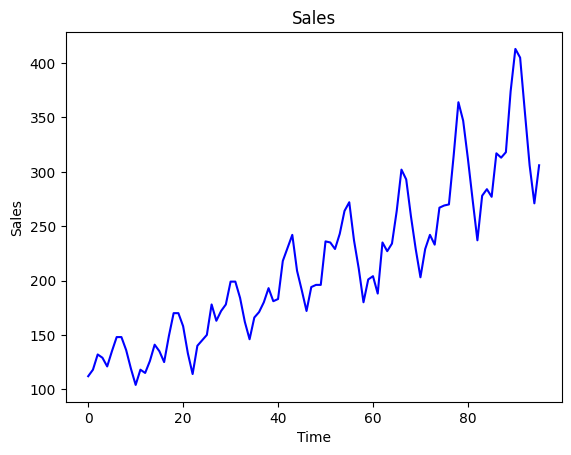

In [25]:
plt.plot(dataset_train, color="blue", label="Sales")
plt.title("Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend
plt.show()

In [26]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [27]:
X_train = []
y_train = []

for i in range(90, len(training_set_scaled)):
  data = training_set_scaled[i-90:i, 0]
  X_train.append(data)
  y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train).reshape(-1, 90, 1)
y_train = np.array(y_train)

In [28]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [29]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
6/6 [==============================] - 6s 16ms/step - loss: 0.3139
Epoch 2/300
6/6 [==============================] - 0s 16ms/step - loss: 0.1625
Epoch 3/300
6/6 [==============================] - 0s 17ms/step - loss: 0.0774
Epoch 4/300
6/6 [==============================] - 0s 15ms/step - loss: 0.0293
Epoch 5/300
6/6 [==============================] - 0s 16ms/step - loss: 0.1060
Epoch 6/300
6/6 [==============================] - 0s 17ms/step - loss: 0.0841
Epoch 7/300
6/6 [==============================] - 0s 15ms/step - loss: 0.0570
Epoch 8/300
6/6 [==============================] - 0s 15ms/step - loss: 0.0430
Epoch 9/300
6/6 [==============================] - 0s 16ms/step - loss: 0.0398
Epoch 10/300
6/6 [==============================] - 0s 21ms/step - loss: 0.0604
Epoch 11/300
6/6 [==============================] - 0s 22ms/step - loss: 0.0481
Epoch 12/300
6/6 [==============================] - 0s 25ms/step - loss: 0.0463
Epoch 13/300
6/6 [==============================]

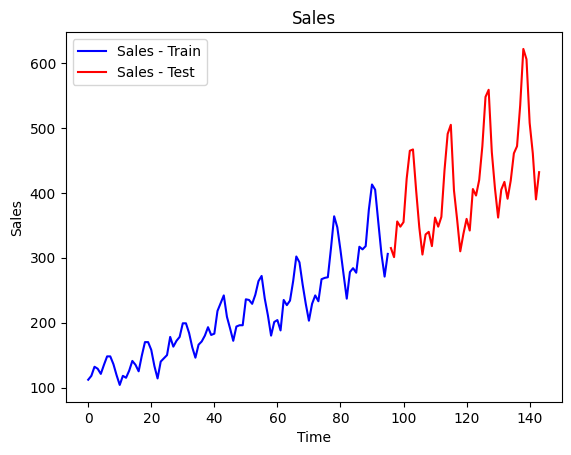

In [30]:
train_values = dataset_train["data"].values
test_values = dataset_test["data"].values

total_values = np.concatenate((train_values, test_values), axis=0)
time_index = range(len(total_values))
plt.plot(time_index[:len(train_values)], train_values, color="blue", label="Sales - Train")
plt.plot(time_index[len(train_values):], test_values, color="red", label="Sales - Test")
plt.title("Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [31]:
dataset_test_anomalies = dataset_test.copy()
dataset_test_anomalies.loc[:9, "data"] = 90
dataset_test_anomalies.loc[10:34, "data"] = np.random.uniform(100, 200, size=(25,))
dataset_test_anomalies.loc[35:, "data"] = 90

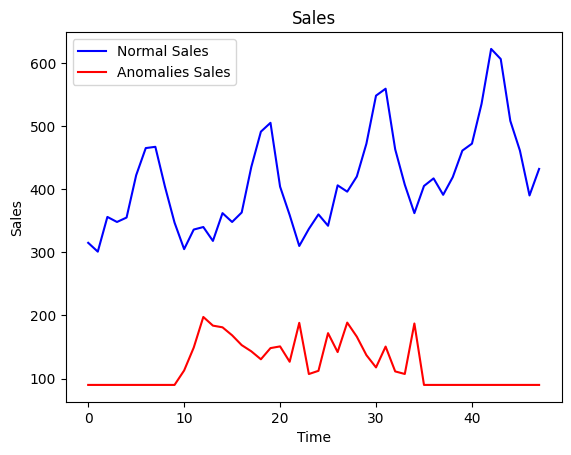

In [32]:
plt.plot(dataset_test, color="blue", label="Normal Sales")
plt.plot(dataset_test_anomalies, color="red", label="Anomalies Sales")
plt.title("Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [33]:
dataset_total = pd.concat((dataset_train["data"], dataset_test["data"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:]
inputs = pd.DataFrame(inputs, columns=["data"])
inputs = sc.fit_transform(inputs)

In [34]:
dataset_total_anomalies = pd.concat((dataset_train["data"], dataset_test_anomalies["data"]), axis=0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies) - len(dataset_test_anomalies) - 90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns=["data"])
inputs_anomalies = sc.fit_transform(inputs_anomalies)

In [35]:
X_test = []
X_test_anomalies = []

for i in range(90, len(inputs)):
  X_test.append(inputs[i-90:i, 0])
  X_test_anomalies.append(inputs_anomalies[i-90:i, 0])

X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [36]:
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

predicted_sales_anomalies = model.predict(X_test_anomalies)
predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

mse_test = mean_squared_error(test_values, predicted_sales)
mse_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

2/2 [==============================] - 0s 12ms/step


In [37]:
print(f"MSE Normal = {mse_test} \nMSE Anomalies = {mse_test_anomalies}")

MSE Normal = 7255.760553024728 
MSE Anomalies = 19138.34295405218


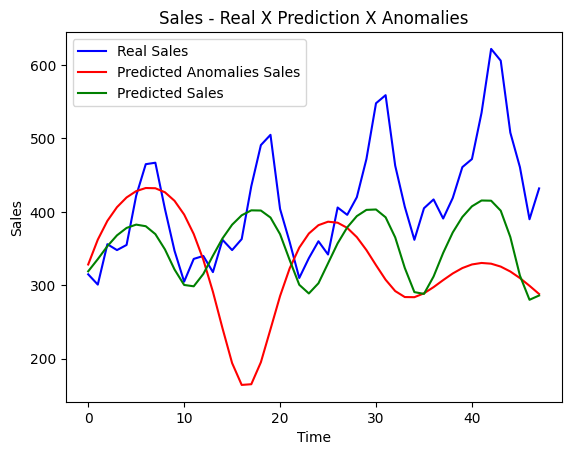

In [38]:
plt.plot(test_values, color="blue", label="Real Sales")
plt.plot(predicted_sales_anomalies, color="red", label="Predicted Anomalies Sales")
plt.plot(predicted_sales, color="green", label="Predicted Sales")
plt.title("Sales - Real X Prediction X Anomalies")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()